# Fase 2: Análisis Exploratorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore

Cargamos el data set limpio

In [2]:
url = 'C:/Users/david.frigerio_softo/Documents/GitHub/Desafio-de-Marketing/data/marketingcampaigns_clean.csv'
df = pd.read_csv(url)

¿Qué canal de marketing se utiliza con mayor frecuencia y cuál genera mejor ROI?
Veamos los canales más utilizads y el ROI por canal

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_5192\2618559784.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='viridis')


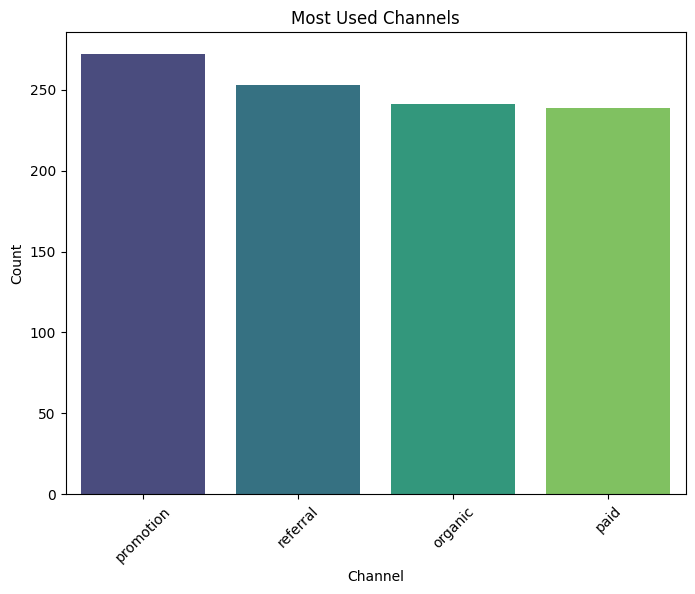

In [3]:
# Count the occurrences of each channel
channel_counts = df['channel'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='viridis')
plt.title('Most Used Channels')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Veamos la combinación de frecuencia de uso y de rendimiento de cada canal

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_5192\2632751192.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel', y='campaign_count', data=channel_analysis, palette='viridis', ax=ax1)
C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_5192\2632751192.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


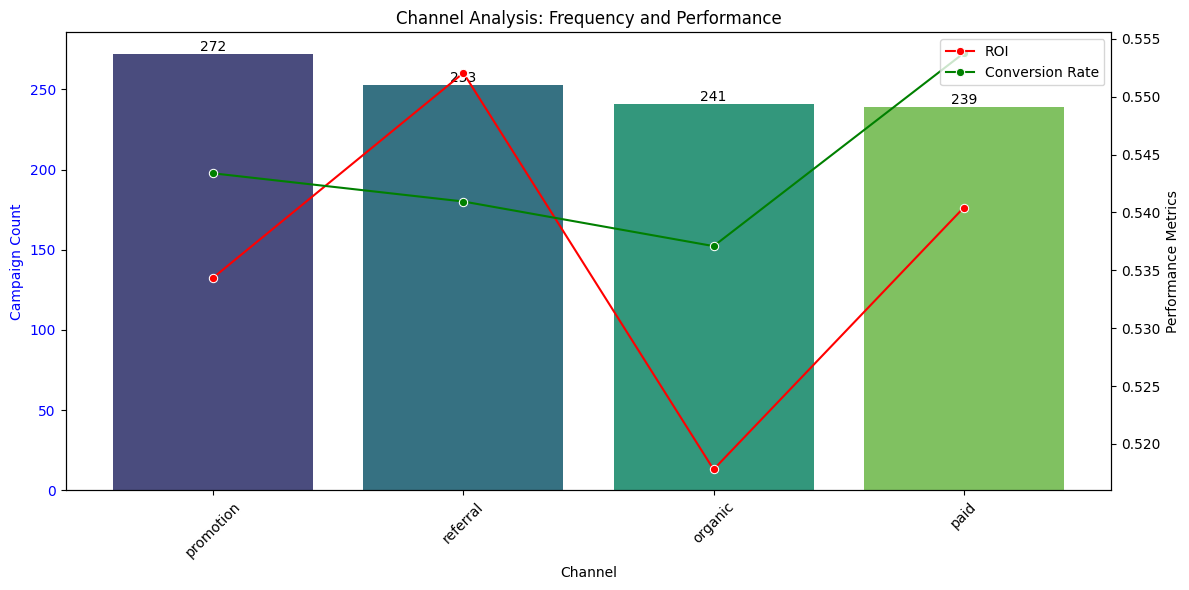

      channel          type       roi  conversion_rate      revenue  \
0     organic         email  0.532353         0.565882  40974485.04   
1     organic       podcast  0.554898         0.485714  24589991.93   
2     organic  social media  0.482833         0.531667  37198381.85   
3     organic       webinar  0.506719         0.550937  31051312.96   
4        paid         email  0.528923         0.510923  35400349.85   
5        paid       podcast  0.501404         0.560526  29346598.78   
6        paid  social media  0.582031         0.549375  34304978.67   
7        paid       webinar  0.546226         0.604340  28013391.00   
8   promotion         email  0.507143         0.569091  36798700.54   
9   promotion       podcast  0.565738         0.511803  33508326.29   
10  promotion  social media  0.541636         0.532909  24900015.10   
11  promotion       webinar  0.531646         0.550000  41295462.35   
12   referral         email  0.544203         0.529275  33671814.01   
13   r

In [4]:
# Group by channel and calculate metrics
channel_analysis = df.groupby('channel').agg({
    'roi': 'mean',
    'conversion_rate': 'mean',
    'revenue': 'sum',
    'net_profit': 'sum',
    'campaign_name': 'count'
}).rename(columns={'campaign_name': 'campaign_count'}).reset_index()

# Sort by campaign count for frequency
channel_analysis = channel_analysis.sort_values(by='campaign_count', ascending=False)

# Plot frequency and performance metrics
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for frequency
sns.barplot(x='channel', y='campaign_count', data=channel_analysis, palette='viridis', ax=ax1)
ax1.set_ylabel('Campaign Count', color='blue')
ax1.set_xlabel('Channel')
ax1.set_title('Channel Analysis: Frequency and Performance')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
for i in ax1.containers:
    ax1.bar_label(i,)

# Line plot for ROI and conversion rate
ax2 = ax1.twinx()
sns.lineplot(x='channel', y='roi', data=channel_analysis, marker='o', color='red', label='ROI', ax=ax2)
sns.lineplot(x='channel', y='conversion_rate', data=channel_analysis, marker='o', color='green', label='Conversion Rate', ax=ax2)
ax2.set_ylabel('Performance Metrics', color='black')
ax2.tick_params(axis='y', labelcolor='black')


# Add legend
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Segment analysis by campaign type or audience
segment_analysis = df.groupby(['channel', 'type']).agg({
    'roi': 'mean',
    'conversion_rate': 'mean',
    'revenue': 'sum',
    'net_profit': 'sum',
    'campaign_name': 'count'
}).rename(columns={'campaign_name': 'campaign_count'}).reset_index()

print(segment_analysis)

Podemos ver que el canal que se utiliza con más frecuencia es "promotion" y el que tiene el mejor ROI es "Referral", que es a su vez el segundo más utilizado

Ahora veamos los diferentes tipos de campaña para identificar cuáles generan más ingresos y tienen mejor tasa de conversión.

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_5192\1131673963.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='revenue', data=campaign_type_analysis, palette='viridis', ax=ax1)
C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_5192\1131673963.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


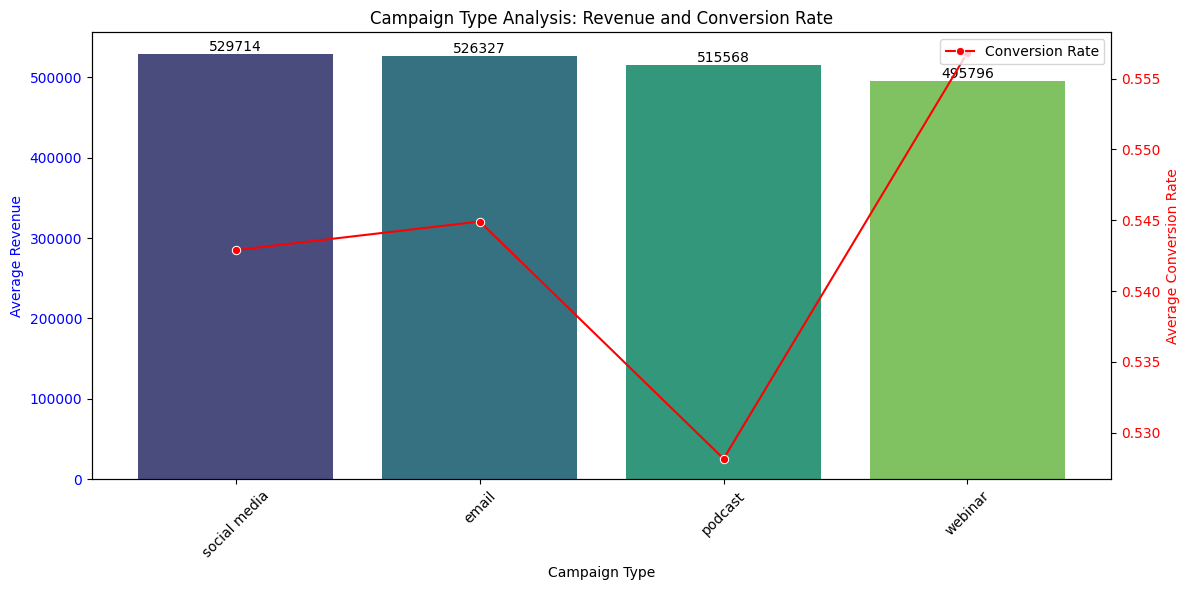

           type        revenue  conversion_rate  campaign_count
2  social media  529713.587191         0.542894             235
0         email  526327.417348         0.544910             279
1       podcast  515567.689127         0.528166             229
3       webinar  495795.526985         0.556832             262


In [5]:
# Agrupar por tipo de campaña y calcular métricas relevantes
campaign_type_analysis = df.groupby('type').agg({
    'revenue': 'mean',
    'conversion_rate': 'mean',
    'campaign_name': 'count'
}).rename(columns={'campaign_name': 'campaign_count'}).reset_index()

# Ordenar por ingresos promedio
campaign_type_analysis = campaign_type_analysis.sort_values(by='revenue', ascending=False)

# Visualizar los resultados
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para ingresos promedio
sns.barplot(x='type', y='revenue', data=campaign_type_analysis, palette='viridis', ax=ax1)
ax1.set_ylabel('Average Revenue', color='blue')
ax1.set_xlabel('Campaign Type')
ax1.set_title('Campaign Type Analysis: Revenue and Conversion Rate')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
for i in ax1.containers:
    ax1.bar_label(i,)

# Gráfico de línea para tasa de conversión promedio
ax2 = ax1.twinx()
sns.lineplot(x='type', y='conversion_rate', data=campaign_type_analysis, marker='o', color='red', label='Conversion Rate', ax=ax2)
ax2.set_ylabel('Average Conversion Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Agregar leyenda
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Mostrar la tabla de análisis
print(campaign_type_analysis)

Podemos ver que las campañas de social media generan los mayores ingresos promedio y los webinars tienen la tasa de conversion mas alta

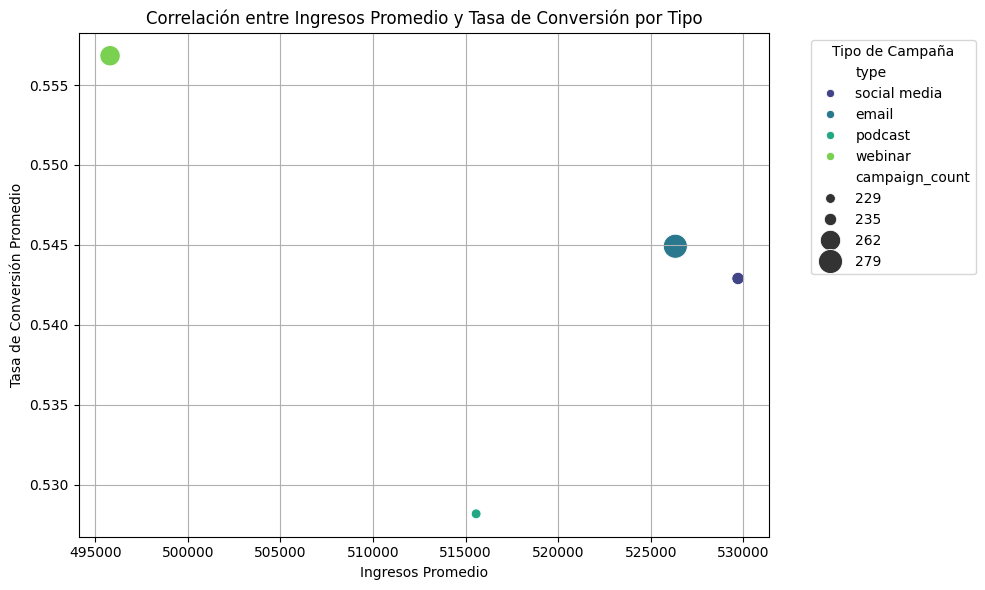

In [7]:
# Diagrama de dispersión para correlación entre ingresos promedio y tasa de conversión
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='revenue', 
    y='conversion_rate', 
    hue='type', 
    size='campaign_count', 
    sizes=(50, 300), 
    data=campaign_type_analysis, 
    palette='viridis'
)

plt.title('Correlación entre Ingresos Promedio y Tasa de Conversión por Tipo')
plt.xlabel('Ingresos Promedio')
plt.ylabel('Tasa de Conversión Promedio')
plt.legend(title='Tipo de Campaña', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos ver, que salvo para el canal webinar, para el resto vemos que hay una correlación directa entre ingresos promedio y tasa de conversión

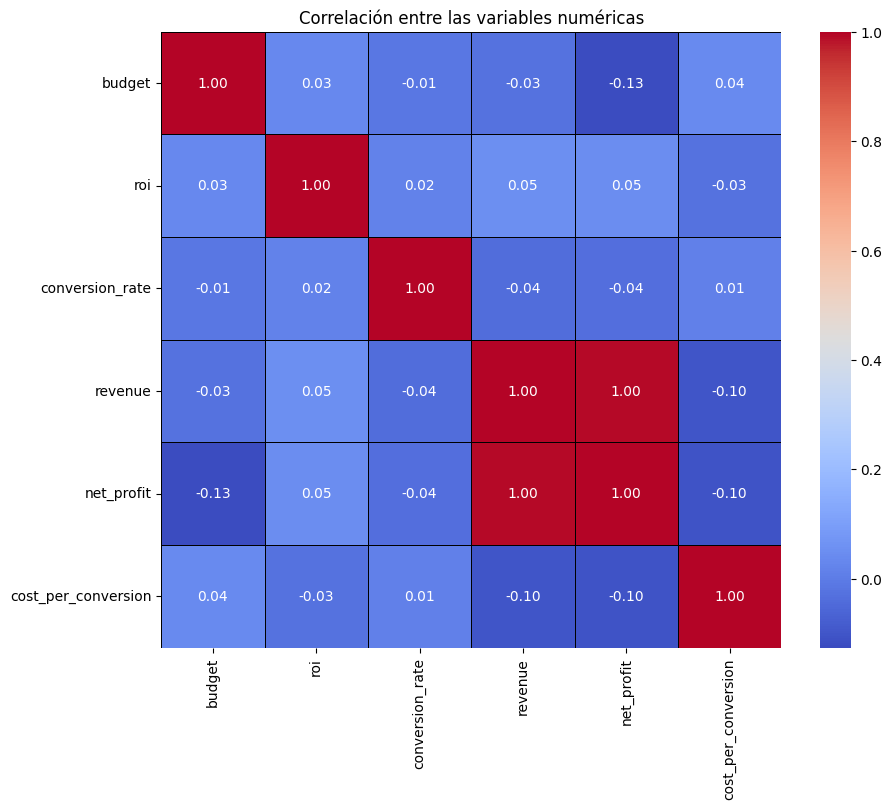

In [23]:
plt.figure(figsize=(10,8))
#sns.heatmap(df.select_dtypes(include='number', exclude='datetime').corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
sns.heatmap(data=df[df['type'] != 'webinar'].select_dtypes(include='float').corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Correlación entre las variables numéricas')
plt.show()

No se ve una correlación directa entre esas variables aunque esperaba ver una correlación entre revenue y conversion rate expecto para las campañas de tipo webinar.

Vamos a ver la relación del ROI con otroas variables del dataset

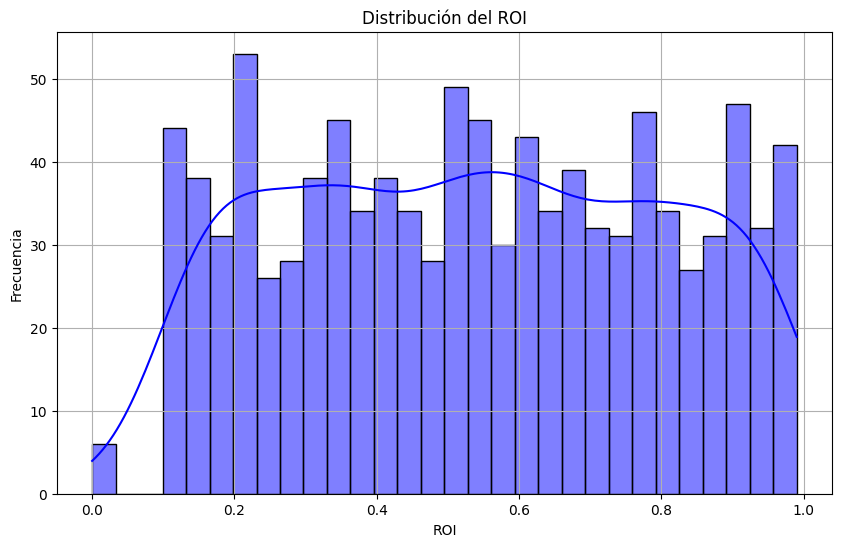

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_5192\3993382229.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=roi_by_channel.index, y=roi_by_channel.values, palette='viridis')


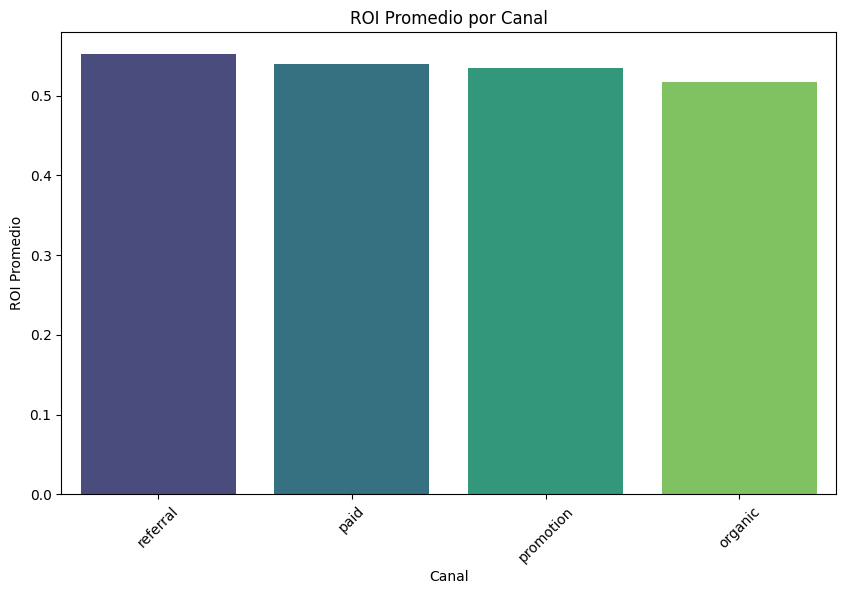

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_5192\3993382229.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=roi_by_campaign_type.index, y=roi_by_campaign_type.values, palette='viridis')


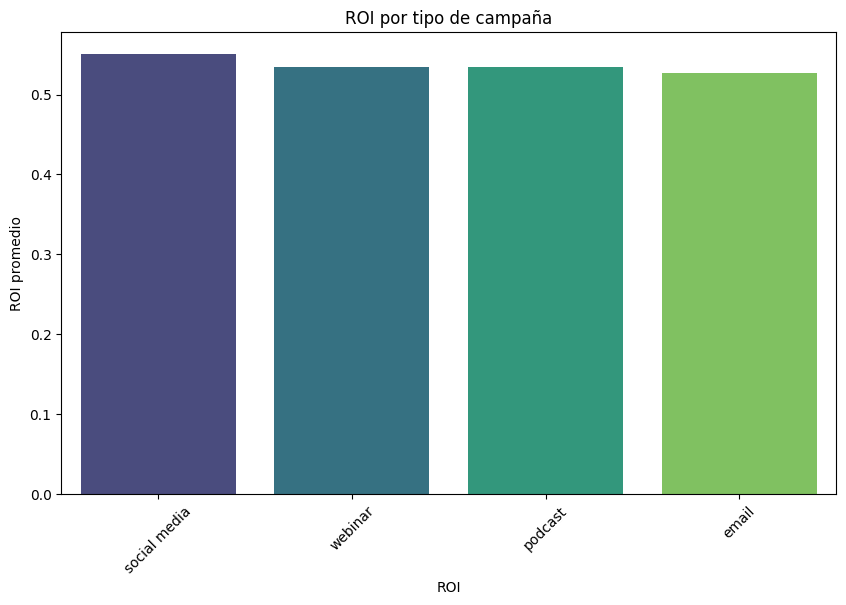

In [25]:
# Visualizar la distribución del ROI
plt.figure(figsize=(10, 6))
sns.histplot(df['roi'], kde=True, bins=30, color='blue')
plt.title('Distribución del ROI')
plt.xlabel('ROI')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Analizar el ROI promedio por canal
roi_by_channel = df.groupby('channel')['roi'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=roi_by_channel.index, y=roi_by_channel.values, palette='viridis')
plt.title('ROI Promedio por Canal')
plt.xlabel('Canal')
plt.ylabel('ROI Promedio')
plt.xticks(rotation=45)
plt.show()

# Analizar el ROI promedio por tipo de campaña
roi_by_campaign_type = df.groupby('type')['roi'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=roi_by_campaign_type.index, y=roi_by_campaign_type.values, palette='viridis')
plt.title('ROI por tipo de campaña')
plt.xlabel('ROI')
plt.ylabel('ROI promedio')
plt.xticks(rotation=45)
plt.show()

vamos a ver si hay diferencias significativas en el comportamiento de las audiencias B2b y B2C

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_5192\1164466904.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=df['target_audience'], y=df['roi'], palette='viridis')


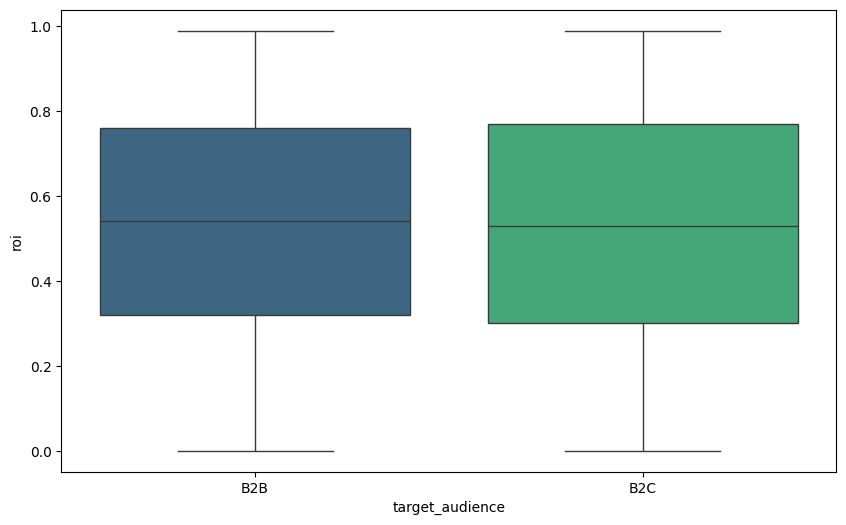

In [30]:
# Compara las tasas de conversión entre los dos tipos de audiencia para determinar si existen diferencias en el comportamiento de compra
#roi_by_audience = df.groupby('target_audience')['roi'].mean()
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x=df['target_audience'], y=df['roi'], palette='viridis')
plt.show()




<Figure size 1200x600 with 0 Axes>

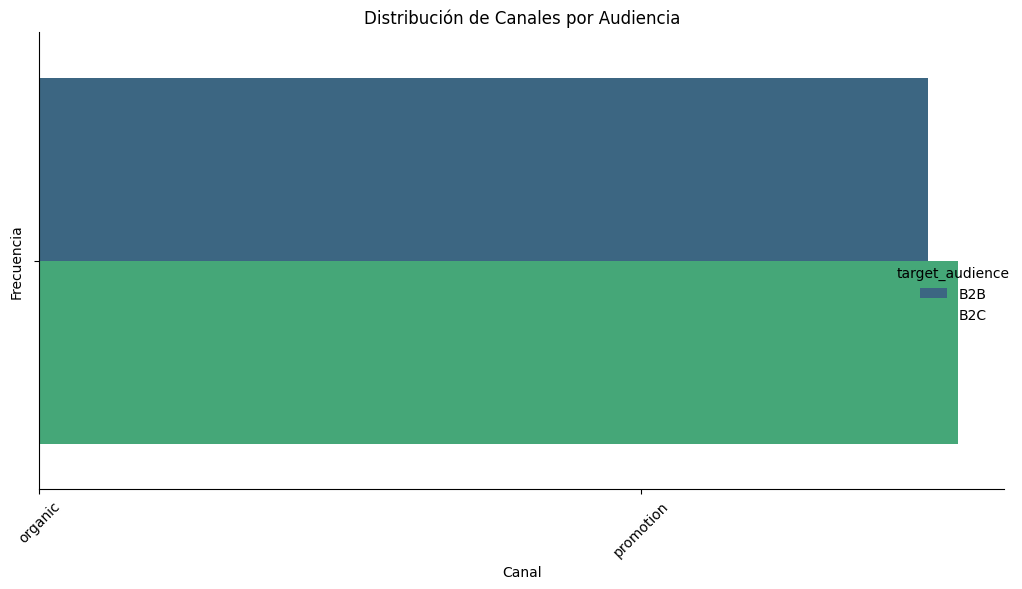

<Figure size 1200x600 with 0 Axes>

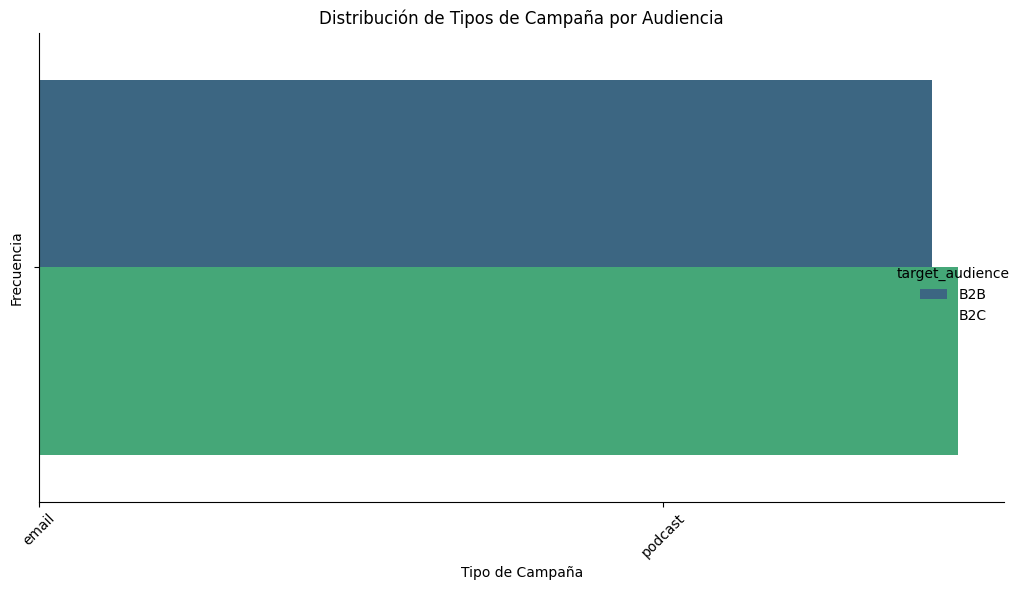

In [ ]:
# Gráfico de barras agrupado por audiencia y canal
plt.figure(figsize=(12, 6))
sns.catplot(
    data=df,
    x='channel',
    hue='target_audience',
    kind='bar',
    errorbar=None,
    palette='viridis',
    height=6,
    aspect=1.5
)
plt.title('Distribución de Canales por Audiencia')
plt.xlabel('Canal')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de barras agrupado por audiencia y tipo de campaña
plt.figure(figsize=(12, 6))
sns.catplot(
    data=df,
    x='type',
    hue='target_audience',
    kind='bar',
    errorbar=None,
    palette='viridis',
    height=6,
    aspect=1.5
)
plt.title('Distribución de Tipos de Campaña por Audiencia')
plt.xlabel('Tipo de Campaña')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()